# IRIS-Flower-classification

Этот проект представляет собой применение машинного обучения с программированием на Python на примере классификации цветов IRIS с использованием машинного обучения с инструментами scikit.
Здесь используются алгоритмы, которые представляют собой некоторые типы машинного обучения с учителем и без учителя.

[Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0) — набор данных для задачи классификации, на примере которого Рональд Фишер в 1936 году продемонстрировал работу разработанного им метода дискриминантного анализа. Иногда его также называют ирисами Андерсона, так как данные были собраны американским ботаником Эдгаром Андерсоном. Этот набор данных стал классическим и часто используется в литературе для иллюстрации работы различных статистических алгоритмов.

Ирисы Фишера состоят из данных о 150 экземплярах ириса, по 50 экземпляров из трёх видов — Ирис щетинистый (Iris setosa), Ирис виргинский (Iris virginica) и Ирис разноцветный (Iris versicolor). Для каждого экземпляра измерялись четыре характеристики (в сантиметрах):

- Длина наружной доли околоцветника (англ. sepal length);
- Ширина наружной доли околоцветника (англ. sepal width);
- Длина внутренней доли околоцветника (англ. petal length);
- Ширина внутренней доли околоцветника (англ. petal width).

На основании этого набора данных требуется построить правило классификации, определяющее вид растения по данным измерений. Это задача многоклассовой классификации, так как имеется три класса — три вида ириса.

Один из классов (Iris setosa) линейно-разделим от двух остальных.

В качестве задания вам предлагается повторить данные действия по классификации для наборов данных (можно выбрать, что больше понравится, но лучше сделать для всех)
- [User Knowledge Modeling Data Set](http://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)
- [Blood Transfusion Service Center Data Set](http://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center)
- [Somerville Happiness Survey Data Set](http://archive.ics.uci.edu/ml/datasets/Somerville+Happiness+Survey)
- [Wine Quality Data Set](https://archive.ics.uci.edu/ml/datasets/wine+quality)



In [14]:
# Подключаем библиотеки
import pandas as pd # Работа с набором данных
import numpy as np # Линейная алгебра
# Визуализация данных
import seaborn as sns
import matplotlib.pyplot as plt

# отключение информационных сообщений
from warnings import filterwarnings
filterwarnings(action='ignore')

# разделение выборки
from sklearn.model_selection import train_test_split
#метрики
from sklearn import metrics
#деревья решений
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [15]:
# читаем данные
url = 'https://raw.githubusercontent.com/ViolettaKalennikova/mo2025/refs/heads/main/data/transfusion.data'
data = pd.read_csv(url)
data.head(5)

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [16]:
data.rename (columns={'whether he/she donated blood in March 2007': 'donated'}, inplace=True)


In [17]:
data.head(5)

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),donated
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [24]:
# Разделим выборку на обучающую и тестовую
train, test = train_test_split(data, test_size = 0.2, stratify = data['donated'], random_state = 42)

In [25]:
# Выделим признаки и результат
X_train = train[['Recency (months)','Frequency (times)','Monetary (c.c. blood)','Time (months)']]
y_train = train.donated
X_test = test[['Recency (months)','Frequency (times)','Monetary (c.c. blood)','Time (months)']]
y_test = test.donated

fn = ['Recency (months)','Frequency (times)','Monetary (c.c. blood)','Time (months)']
cn = data['donated'].unique()

In [36]:
# Деревья решений
# Параметр random_state задает начальную инициализацию генератора псевдслучайных чисел, чтобы данные были одинаковые при каждом запуске

#Выбираем классификатор
mod_dt = DecisionTreeClassifier(max_depth = 3, random_state = 1)
#Проводим обучение
mod_dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [37]:
#Выполняем предсказание
y_pred=mod_dt.predict(X_test)

print('accuracy (точность) классификатора Деревья решений',metrics.accuracy_score(y_pred,y_test))

# матрица ошибок
print("матрица ошибок")
print(metrics.confusion_matrix(y_test, y_pred))

accuracy (точность) классификатора Деревья решений 0.8
матрица ошибок
[[104  10]
 [ 20  16]]


In [38]:
# Использование построенной модели для предсказания класса
new_iris=[1, 21, 6000, 24]
y_new_iris=mod_dt.predict([new_iris])

print(y_new_iris)

[1]


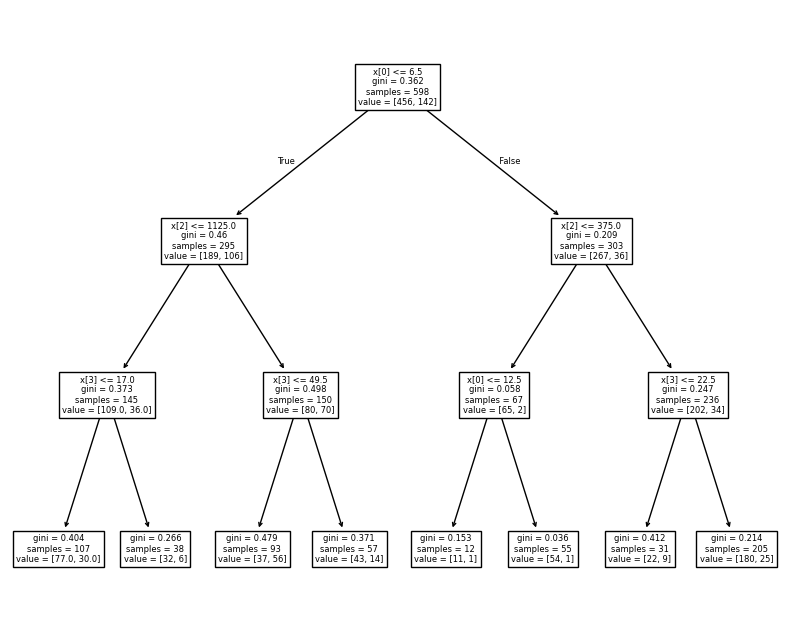

In [42]:
#визуализация деревьев решений
plt.figure(figsize= (10,8))
plot_tree(mod_dt);